# Memoria

La motivación principal del presente trabajo es porque me ha gustado desde siempre el mundo del futbol, tanto verlo como practicarlo y jugarlo en consolas. En especial este último, jugarlo en la play. El fifa es el juego que con diferencia más tiempo le he dedicado en mi vida. Y es por ello que desde que me interesó el mundo del data science ya pensé en hacer el presente trabajo. Ya por una cuestión de interés personal, por saber si se cumplían o no determinados patrones en función de las stats del juego en la realidad. Es por esto, que en cuanto supe que ibamos a hacer un eda pensé directamente en este tema. Eso, y que de verás tengo interés en comprobas si luego se le puede aplicar a estos resultados algunos algoritmos de ML.
En cuanto al road map del proyecto ha sido el siguiente: 
- localizar las bases de datos (kaggle principalmente)
- Escrapear los datos con selenium
- Unir mediante identificador los datasets
- Realizar el propio análisis

Es cierto que lo que primero destacaría sería la parte tan importante y compleja que es la obtención de los datos para llevar a cabo el proyecto. Digamos que se me ha ido el 80% del tiempo nada más que en obtener la información relevante para el EDA, categorizar lo que vale y lo que no y establecer la fuente de datos del trabajo final. Para ello lo que hice fue en primer lugar bucear por kaggle en busca de datasets ya formados. de aquí lo que obtuve con cierta sencillez fueron los datasets del fifa desde el 2015 hasta el 2022. Posteriormente lo que hice fue conectarme via api de pago pero con clave de prueba durante 7 para acceder a determinados niveles (los cuales no me valían). Y después me puse a desarrollar un scrapping de la página de futbol de Besoccer directamente. Actualmente he conseguido dejar el código funcionando y aunque todavía hay cosas que pulir lo he creado de tal forma que es bastante escalable y mantenible de tal forma que ya ahora mismo me permite obtener todas las estadisticas que necesito de todas las ligas posibles y que me devuelva directamente un fichero final con las columnas que me interesan(goles, asistencias, tarjetas). Lo hice previamente supervisando todo el proceso pero una vez lo terminé lo ejecuté sin problema en modo headless teniendo unos resultados muy satisfactorios. 

La segunda piedra grande en el camino fue la de relacionar el dataset del fifa con el obtenido via web scrapping. Lo que hice finalmente es una función que te permite ir recorriendo los nombres cortos y largos (hay 2 tipos en el dataset del fifa) y comprobar primero si matchean directamente alguno de los nombres con el dataset scrapeado, si es que sí lo que hace es poner el identificador en el fichero scrapeado. Si no matchea, tiene una segunda coprobación, mediante fuzzy para ver la distancia entre ambos nombres  y de igual modo coloca en el fichero scrapeado el id del fifa.

Una vez tuve eso el resto fue más sencillo, pues lo único donde obtuve dificltad fue en seleccionar los diferentes plots posibles para lo que quería representar. 


# 0. CARGAR LIBRERIAS, ARCHIVOS Y LIMPIEZA DE DATOS

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display,HTML

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)

In [2]:
df_fifa = pd.read_csv("./data/players_22.csv")
df_reales = pd.read_csv("./data/datos_reales_15_10_2024_id.csv")

## Tratar los datos y columnas

In [3]:
# Cambiar nombre id
df_fifa.rename(columns={"sofifa_id":"id_j"},inplace=True)
df_reales.rename(columns={"match_id":"id_j"},inplace=True)

In [4]:
# eliminar columnas que sobran
df_fifa.drop(["player_url"],inplace=True,axis=1)
df_reales.drop(["Unnamed: 0"],inplace=True,axis=1)

In [5]:
df_fifa = df_fifa[df_fifa["league_name"].isin(["Italian Serie A", "French Ligue 1","English Premier League","Spain Primera Division","German 1. Bundesliga"])]

In [6]:
cols = []
for i in df_fifa.columns:
    cols.append(i)

In [7]:
for i in cols:
    print(i)

id_j
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_compos

In [8]:
df_fifa.isnull().sum()

id_j                              0
short_name                        0
long_name                         0
player_positions                  0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
club_name                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_loaned_from               2722
club_joined                     206
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
nation_team_id                 2604
nation_position                2604
nation_jersey_number           2604
preferred_foot                    0
weak_foot                   

In [9]:
# INPUTE NAN VALUES with mean
fill_values = df_fifa.loc[:,["pace","shooting","passing","dribbling","defending","physic"]]

for i in fill_values:
    df_fifa[i].fillna(df_fifa[i].mean(),inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_3004\3975976272.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fifa[i].fillna(df_fifa[i].mean(),inplace=True)


In [202]:
df_fifa.isnull().sum()


id_j                              0
short_name                        0
long_name                         0
player_positions                  0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
club_name                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_loaned_from               2763
club_joined                     213
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
nation_team_id                 2627
nation_position                2627
nation_jersey_number           2627
preferred_foot                    0
weak_foot                   

# 1. ANALISIS EXPLORATORIO DATASET FIFA

## H1 jugadores con más media (top 10)

In [124]:
h1 = df_fifa.sort_values('overall', ascending=False)[['short_name', 'overall']][:10]

C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\46997558.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




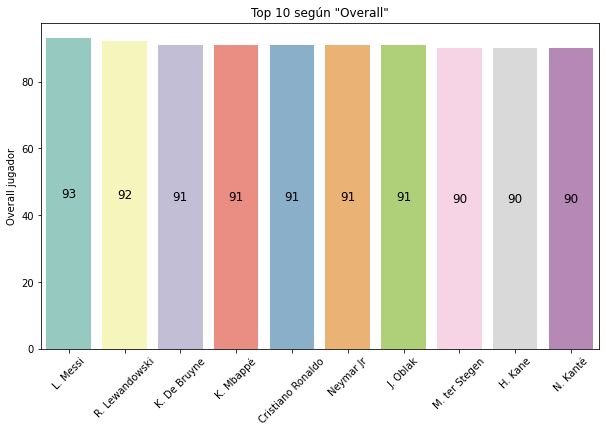

In [155]:
h1 = h1.sort_values("overall", ascending=False)[:10]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='short_name', y='overall', data=h1, palette='Set3')
plt.title('Top 10 según "Overall"')
plt.xlabel('')
plt.ylabel('Overall jugador')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=12)
plt.show()


## H2 Top 10 Paises con los jugadores con más medias

In [157]:
h2 = df_fifa.groupby(['nationality_name'])['overall'].max().sort_values(ascending = False).to_frame().head(10)
h2

,overall
nationality_name,
Argentina,93
Poland,92
Belgium,91
France,91
Brazil,91
Portugal,91
Slovenia,91
Germany,90
England,90


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\479500909.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




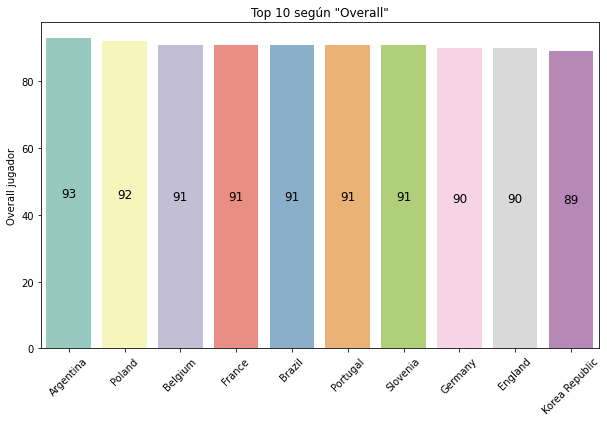

In [158]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='nationality_name', y='overall', data=h2, palette='Set3')
plt.title('Top 10 según "Overall"')
plt.xlabel('')
plt.ylabel('Overall jugador')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=12)
plt.show()


## H3 Top 10 clubes con los jugadores con más medias

In [181]:
h3 = df_fifa.groupby(['club_name'])['overall'].max().sort_values(ascending = False)
h3 = h3.reset_index().head(10)
h3


,club_name,overall
0,Paris Saint-Germain,93
1,FC Bayern München,92
2,Manchester United,91
3,Manchester City,91
4,Atlético de Madrid,91
5,Tottenham Hotspur,90
6,FC Barcelona,90
7,Chelsea,90
8,Liverpool,89
9,Real Madrid CF,89


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\2969072711.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




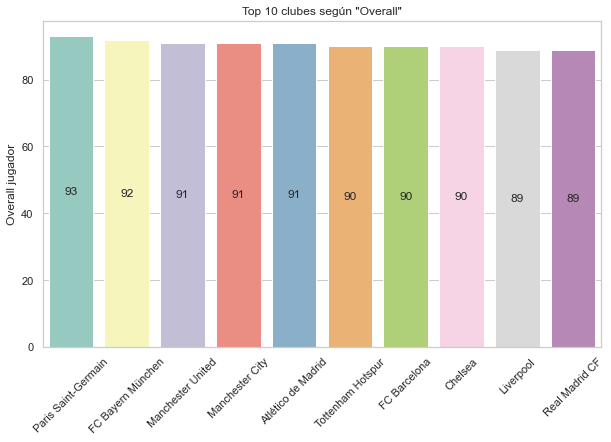

In [184]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='club_name', y='overall', data=h3, palette='Set3')
plt.title('Top 10 clubes según "Overall"')
plt.xlabel('')
plt.ylabel('Overall jugador')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=12)
plt.show()

## H6 Top 10 clubes según sus medias

In [187]:
club_media_overall = df_fifa.groupby('club_name')['overall'].mean().reset_index()
club_media_overall.columns = ['club_name', 'media_overall']
club_media_overall = club_media_overall.sort_values(by='media_overall', ascending=False)
top_clubs = club_media_overall.head(10)

top_clubs


,club_name,media_overall
46,Juventus,79.961538
62,Paris Saint-Germain,79.454545
45,Inter,78.857143
34,FC Bayern München,78.071429
54,Manchester United,78.000000
71,Real Madrid CF,77.757576
56,Napoli,77.500000
9,Atalanta,77.480000
72,Real Sociedad,77.280000
53,Manchester City,76.906250


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\2984146984.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




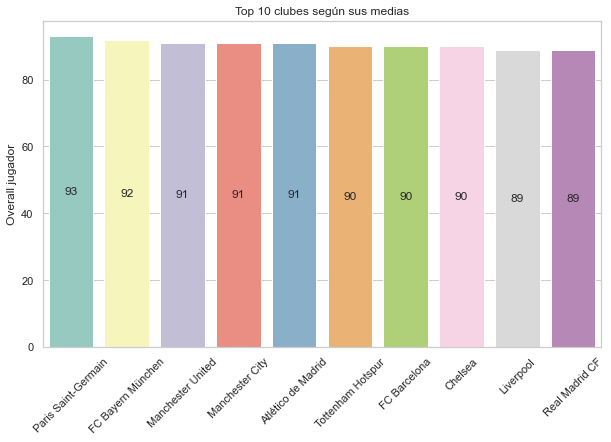

In [188]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='club_name', y='overall', data=h3, palette='Set3')
plt.title('Top 10 clubes según sus medias')
plt.xlabel('')
plt.ylabel('Overall jugador')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=12)
plt.show()

## H6 Distribución de la edad de los jugadores en los equipos 

C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\354760298.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




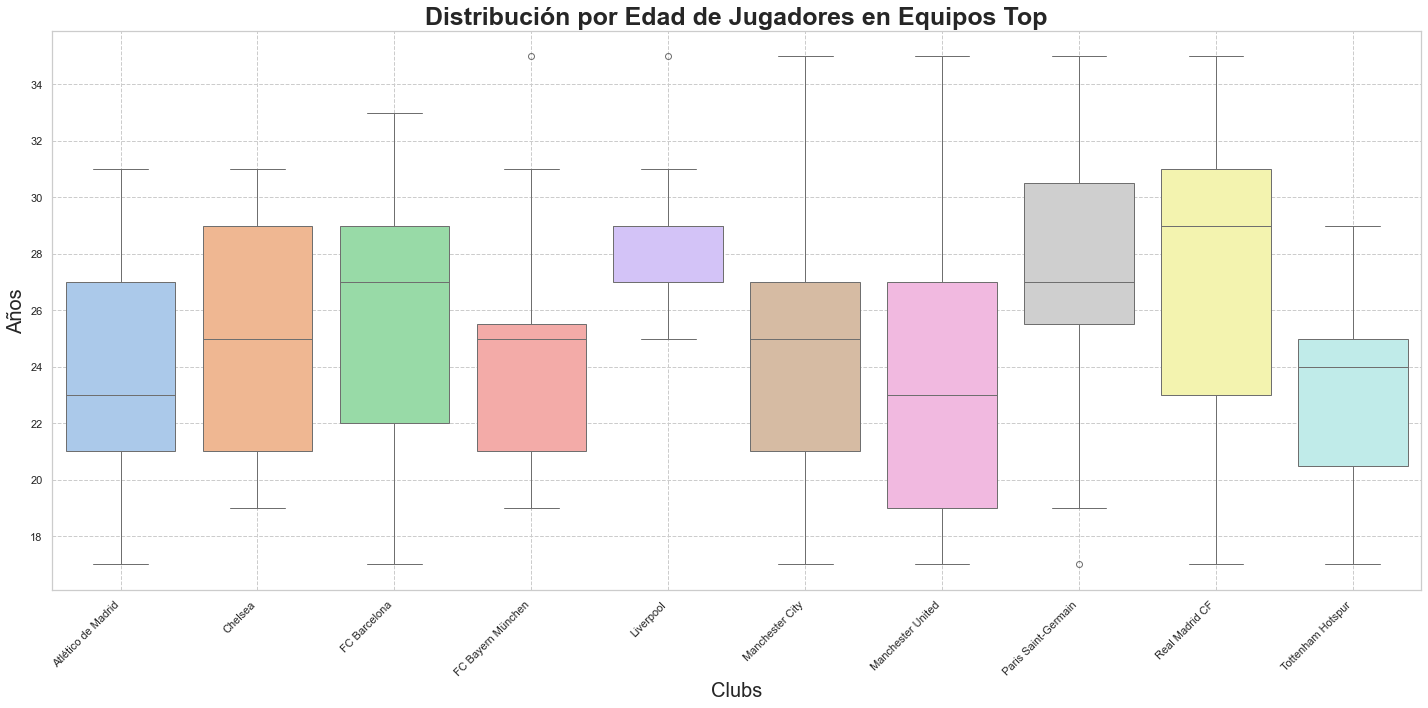

In [171]:
h4 = h3.index.to_list()
clubs = df_fifa.loc[df_fifa['club_name'].isin(h4) & df_fifa['age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(style="whitegrid")
ax = sns.boxplot(x="club_name", y="age", data=clubs, palette="pastel")
ax.set_title(label='Distribución por Edad de Jugadores en Equipos Top', fontsize=25, fontweight='bold')
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Años', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(visible=True, linestyle='--')
plt.tight_layout()
plt.show()


## H7 Distribución de la media en los clubes más populares

In [ ]:
club_media_overall = df_fifa.groupby("club_name")["overall"].mean().reset_index()
club_media_overall.columns = ["club_name", "media_overall"]
club_media_overall = club_media_overall.sort_values(by="media_overall", ascending=False)

top_clubs = club_media_overall.head(10)
top_clubs

data_clubs = df_fifa.loc[df_fifa['club_name'].isin(top_clubs.club_name) & df_fifa['overall']] 
data_clubs.head()


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\592315365.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




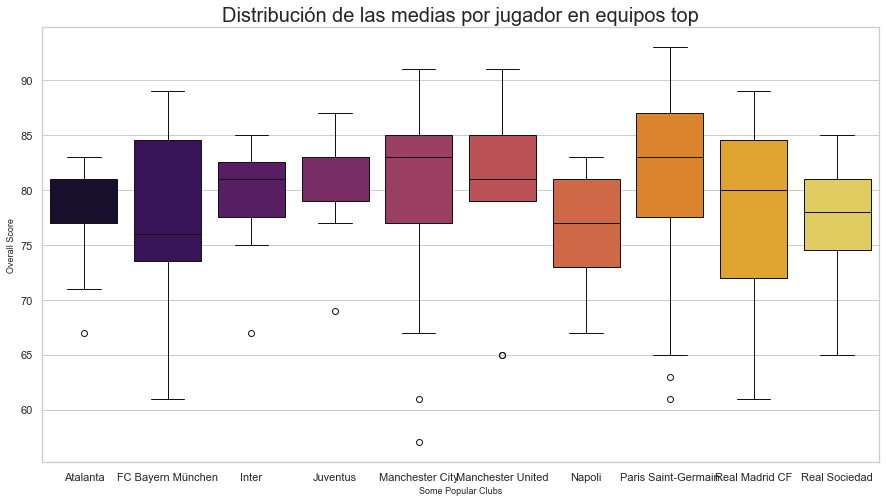

In [195]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['club_name'], y = data_clubs['overall'], palette = 'inferno') 
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribución de medias por jugador en equipos top', fontsize = 20)
plt.xticks()
plt.show()



## H8 COMPARACIÓN JUGADORES

In [238]:
# Generales
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']

In [198]:
# Skills totales
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

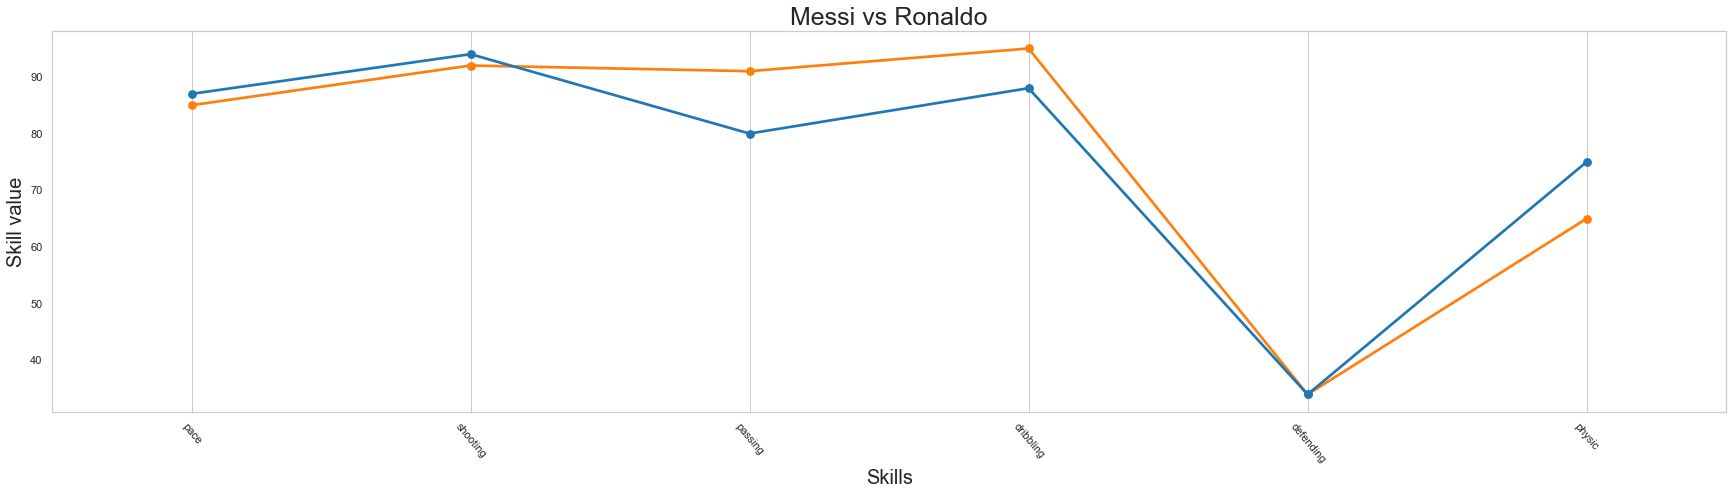

In [239]:
messi = df_fifa.loc[df_fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = df_fifa.loc[df_fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)

plt.figure(figsize=(30,7))
sns.pointplot(data=messi,color='#ff7f0e')
sns.pointplot(data=ronaldo, color='#1f77b4')
plt.xticks(rotation=-50)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo', fontsize = 25)
plt.grid()

## MBAPPE/HALLAND

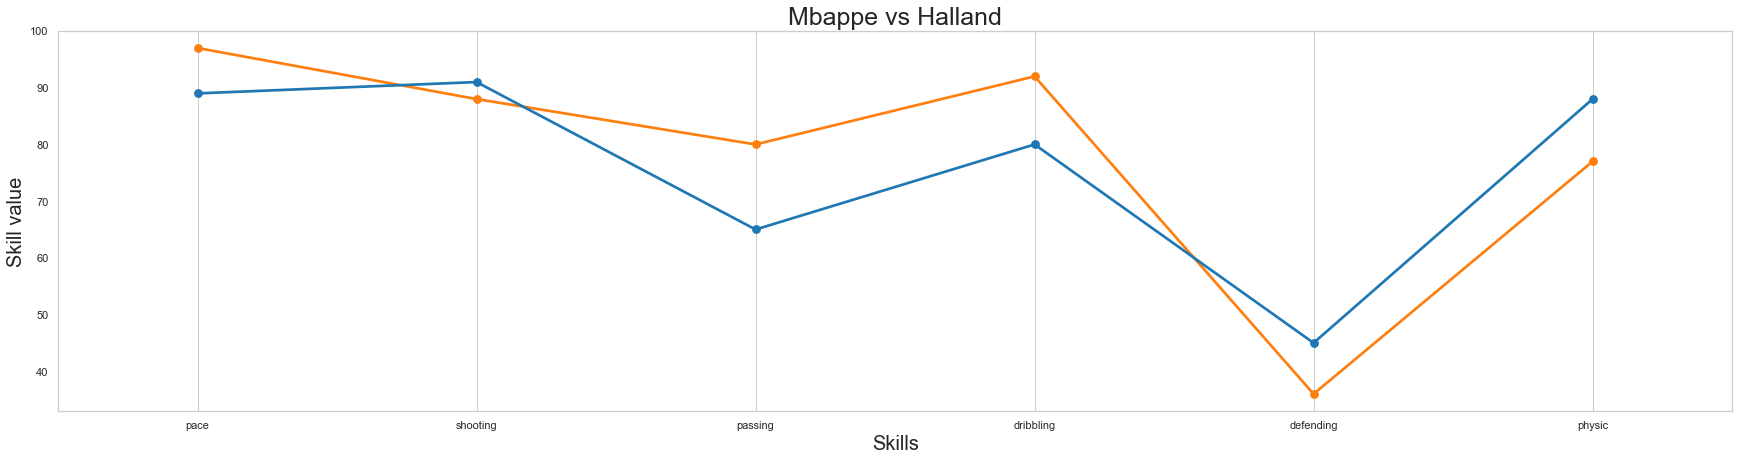

In [240]:
mbappe = df_fifa.loc[df_fifa['short_name'] == 'K. Mbappé']
mbappe = pd.DataFrame(mbappe, columns = skills)
halland = df_fifa.loc[df_fifa['short_name'] == 'E. Haaland']
halland = pd.DataFrame(halland, columns = skills)

plt.figure(figsize=(30,7))
sns.pointplot(data=mbappe,color='#ff7f0e')
sns.pointplot(data=halland, color='#1f77b4')
plt.xticks()
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Mbappe vs Halland', fontsize = 25)
plt.grid()

## MESSI/CRISTIANO/MBAPPE/HALLAND

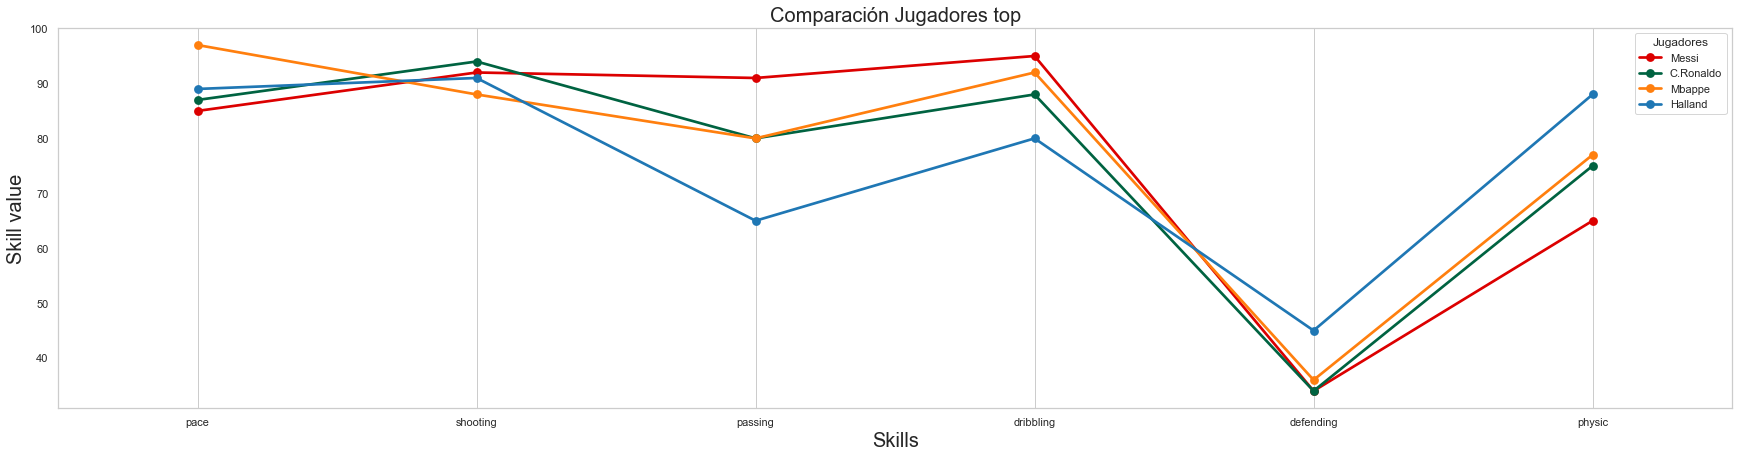

In [241]:
messi = df_fifa.loc[df_fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = df_fifa.loc[df_fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
mbappe = df_fifa.loc[df_fifa['short_name'] == 'K. Mbappé']
mbappe = pd.DataFrame(mbappe, columns = skills)
halland = df_fifa.loc[df_fifa['short_name'] == 'E. Haaland']
halland = pd.DataFrame(halland, columns = skills)




plt.figure(figsize=(30,7))
sns.pointplot(data=messi,color='#dc0000', label="Messi")
sns.pointplot(data=ronaldo, color='#006341', label="C.Ronaldo")
sns.pointplot(data=mbappe,color='#ff7f0e', label="Mbappe")
sns.pointplot(data=halland, color='#1f77b4', label="Halland")

plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Comparación Jugadores top', fontsize = 20)
plt.legend(title="Jugadores")

plt.grid()

------------------------------------------------------------------------------------------------------------------------

# 2. ANALISIS EXPLORATORIO CON DATOS REALES

## H1 Top 10 jugadores con mas goles en 2022


In [21]:
h1 = df_fifa[["id_j","short_name"]]
h1 = pd.merge(h1, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!
h1.head()

,id_j,short_name,goles
0,207562,S. Andersson,2
1,41236,Z. Ibrahimović,8
2,232656,T. Hernández,5
3,232656,T. Hernández,1
4,210413,A. Romagnoli,2


Text(0.5, 1.0, 'Top 10 goleadores segun sus goles')

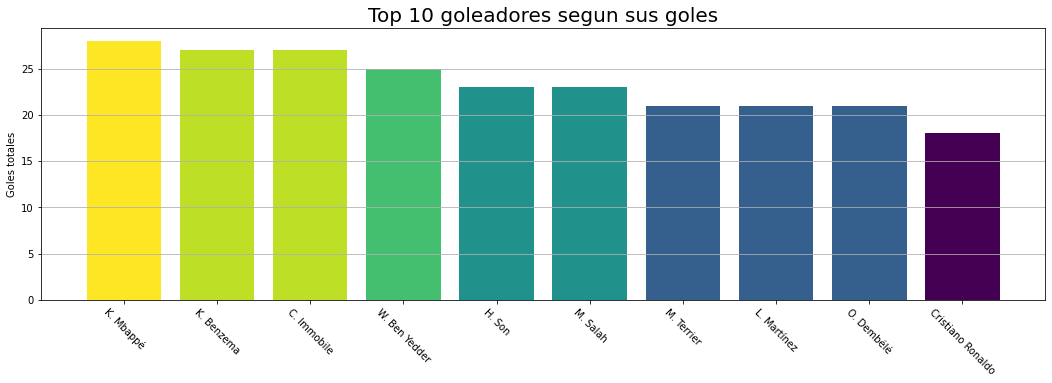

In [34]:
h1 = h1.sort_values("goles", ascending=False)[:10]
fig = plt.figure(figsize=(18,5))
# cmap = plt.get_cmap("YlGnBu")
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(h1["goles"]), max(h1["goles"]))
plt.bar(x="short_name", height="goles", data=h1, color=cmap(norm(h1["goles"])))
plt.ylabel("Goles totales")
plt.xticks(rotation=-45);
plt.grid(axis='y', zorder=0)
plt.title("Top 10 goleadores segun sus goles" ,fontsize=20)


## H2 Niveles de 'shooting' del top 10


In [197]:
h2 = df_fifa[["id_j","short_name","shooting"]]
h2 = pd.merge(h2, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!

In [198]:
h2 = h2.sort_values("goles",ascending=False)[:10]

### Opc1

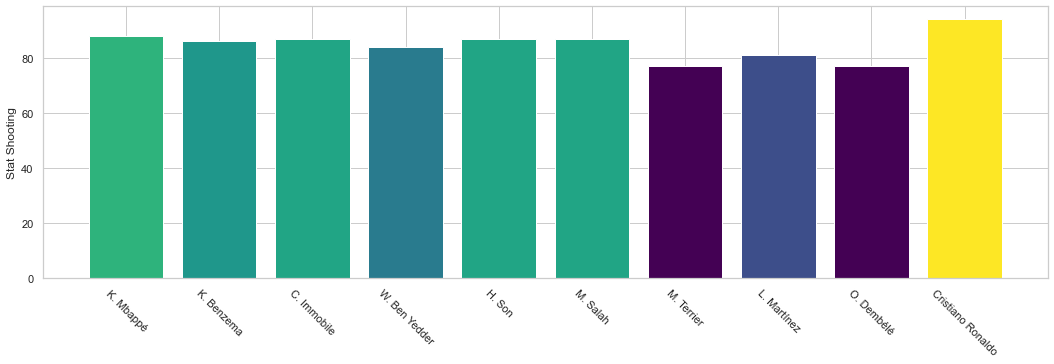

In [199]:
fig = plt.figure(figsize=(18,5))
plt.bar(x="short_name", height="shooting",data=h2)


cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(h2["shooting"]), max(h2["shooting"]))
plt.bar(x="short_name", height="shooting", data=h2, color=cmap(norm(h2["shooting"])))
plt.ylabel("Stat Shooting")
plt.xticks(rotation=-45)
plt.grid(axis='y', zorder=0);

### Opc2

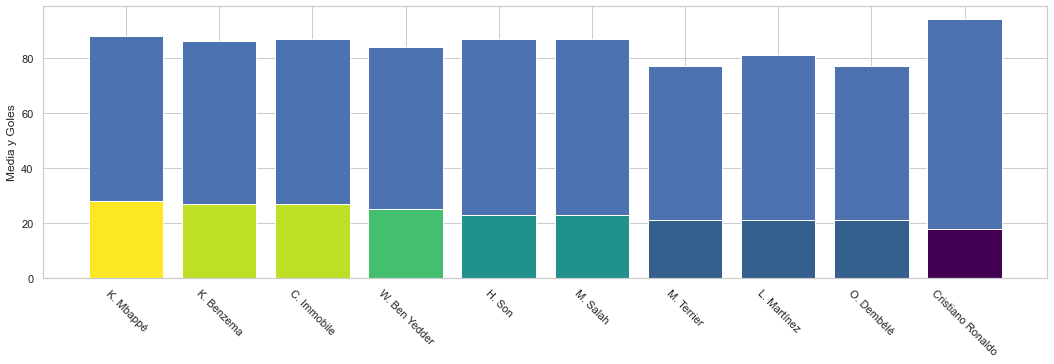

In [200]:
fig = plt.figure(figsize=(18,5))
plt.bar(x="short_name", height="shooting",data=h2)


cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(h2["goles"]), max(h2["goles"]))
plt.bar(x="short_name", height="goles", data=h2, color=cmap(norm(h2["goles"])))
plt.ylabel("Media y Goles")
plt.xticks(rotation=-45)
plt.grid(axis='y', zorder=0);

## H3 Relación entre Shooting vs Goles reales

In [77]:
h3 = h2
h3

,id_j,short_name,shooting,goles
478,231747,K. Mbappé,88.0,28
532,165153,K. Benzema,86.0,27
335,192387,C. Immobile,87.0,27
16,199451,W. Ben Yedder,84.0,25
634,200104,H. Son,87.0,23
386,209331,M. Salah,87.0,23
620,236786,M. Terrier,77.0,21
303,231478,L. Martínez,81.0,21
238,231443,O. Dembélé,77.0,21
417,20801,Cristiano Ronaldo,94.0,18


### Comparación de Goles y Habilidades de Disparo top 10 goleadores

In [122]:
h3 = h3.sort_values(by="shooting",ascending=False)
fig = px.scatter(h3, x="shooting",y="goles", color="goles", size="shooting", hover_data=["short_name","shooting","goles"])

fig.update_layout(
    title={
        'text': "Relación de Goles reales y Habilidades de Disparo del Top ten",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    },width=1000, height=500
)

fig.show()

### Relación goles reales y habilidades de disparo general de todos los goleadores

In [117]:
h3_2 = df_fifa[["id_j","short_name","shooting"]]
h3_2 = pd.merge(h3_2, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!
h3_2=h3_2.sort_values("goles",ascending=False)
fig = px.scatter(h3_2, x="shooting",y="goles", size="goles", color_continuous_scale=px.colors.sequential.Viridis, color="goles",hover_data=["short_name","shooting","goles"])
fig.update_layout(
    title={
        'text': "Relación de Goles reales y Habilidades de Disparo.",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    },width=1000, height=500
)
fig.show()

## H4 Está relacionado las habilidades de pase con las asistencias reales?

In [229]:
df_fifa.head()
h4 = df_fifa[["id_j","short_name","passing"]]
h4 = pd.merge(h4, df_reales[["id_j","asistencias"]],how="left", on="id_j",) # !!!


In [230]:
h4["asistencias"] = h4["asistencias"].fillna(0)
h4["asistencias"] = h4["asistencias"].astype(int)

In [231]:
h4=h4.sort_values("asistencias",ascending=False)
fig = px.scatter(h4, x="passing",y="asistencias", size="asistencias", color_continuous_scale=px.colors.sequential.Viridis, color="asistencias",hover_data=["short_name","passing","asistencias"])
fig.update_layout(
    title={
        'text': "Relación habilidades de pase y asistencias.",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    },width=1000, height=500
)
fig.show()

## H5 Está relacionado las habilidades de defensa con las tarjetas?

In [95]:
h5 = df_fifa[["id_j","short_name","defending"]]
h5 = pd.merge(h5, df_reales[["id_j","tarjetas"]],how="left", on="id_j",) # !!!


In [96]:
h5["tarjetas"] = h5["tarjetas"].fillna(0)
h5["tarjetas"] = h5["tarjetas"].astype(int)
h5["defending"] = h5["defending"].fillna(0)
h5["defending"] = h5["defending"].astype(int)

In [233]:
fig = px.scatter(h5, x="defending",y="tarjetas", size="tarjetas", color_continuous_scale=px.colors.sequential.Viridis, color="tarjetas",hover_data=["short_name","defending","tarjetas"])
fig.update_layout(
    title={
        'text': "Relación entre habilidades de defensa y tarjetas",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    },width=1000, height=500
)
fig.show()

## H6 Está relacionado la fuerza y la defensa con las tarjetas?

In [235]:
h6 = df_fifa[["id_j","short_name","defending","physic"]]
h6 = pd.merge(h6, df_reales[["id_j","tarjetas"]],how="left", on="id_j",) # !!!


In [236]:
h6["tarjetas"] = h6["tarjetas"].fillna(0)
h6["tarjetas"] = h6["tarjetas"].astype(int)
h6["physic"] = h6["physic"].fillna(0)
h6["physic"] = h6["physic"].astype(int)
h6["defending"] = h6["defending"].fillna(0)
h6["defending"] = h6["defending"].astype(int)

In [237]:
fig = px.scatter(h6, x="defending",y="tarjetas", size="physic", color_continuous_scale=px.colors.sequential.Viridis, color="physic", hover_data=["short_name","defending","physic","tarjetas"])
fig.update_layout(
    title={
        'text': "Relación entre fuerza y defensa y las tarjetas",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    },width=1000, height=500
)
fig.show()

## H7 Relación entre el overall y los goles

In [ ]:
h3_2 = df_fifa[["id_j","short_name","shooting"]]
h3_2 = pd.merge(h3_2, df_reales[["id_j","goles"]],how="inner", on="id_j",) # !!!
h3_2=h3_2.sort_values("goles",ascending=False)
fig = px.scatter(h3_2, x="shooting",y="goles", size="goles", color_continuous_scale=px.colors.sequential.Viridis, color="goles",hover_data=["short_name","shooting","goles"])
fig.update_layout(
    title={
        'text': "Relación de Goles reales y Habilidades de Disparo.",
        'font': {'size': 24},  # Tamaño de la fuente
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclar el título al centro
    },width=1000, height=500
)
fig.show()

## H8 Qué posisción ha marcado más goles?

In [219]:
# nombre,goles,posicion

h8 = df_reales
h8.head()

,nombre,id_j,posicion,pj,pt,goles,asistencias,tarjetas,equipo,porteria
0,K. Mbappé,231747,delantero,35,34,28,17,10,psg,0
1,K. Benzema,165153,delantero,32,31,27,12,0,real_madrid,0
2,C. Immobile,192387,delantero,31,31,27,2,4,lazio,0
3,W. Ben Yedder,199451,delantero,37,29,25,5,3,monaco,0
4,M. Salah,209331,delantero,35,30,23,13,1,liverpool,0


c:\python\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\python\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='posicion', ylabel='goles'>

c:\python\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\python\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\python\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



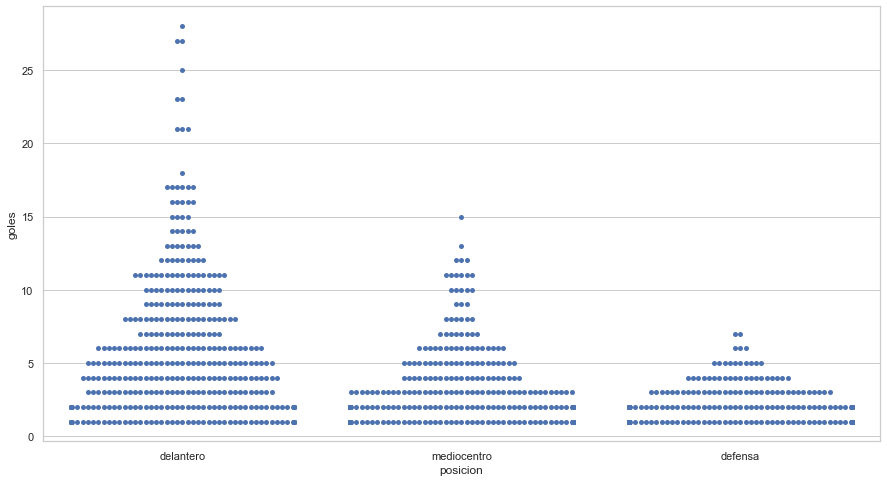

In [220]:
sns.swarmplot(x="posicion", y="goles", data=h8)

<Axes: xlabel='posicion', ylabel='goles'>

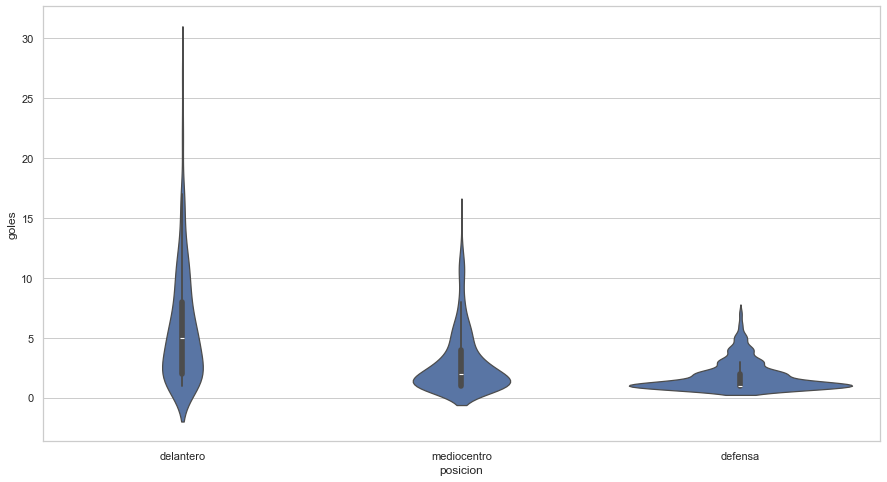

In [209]:
sns.violinplot(x="posicion", y="goles", data=h8)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\985197951.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Distribución de Goles por Posición')

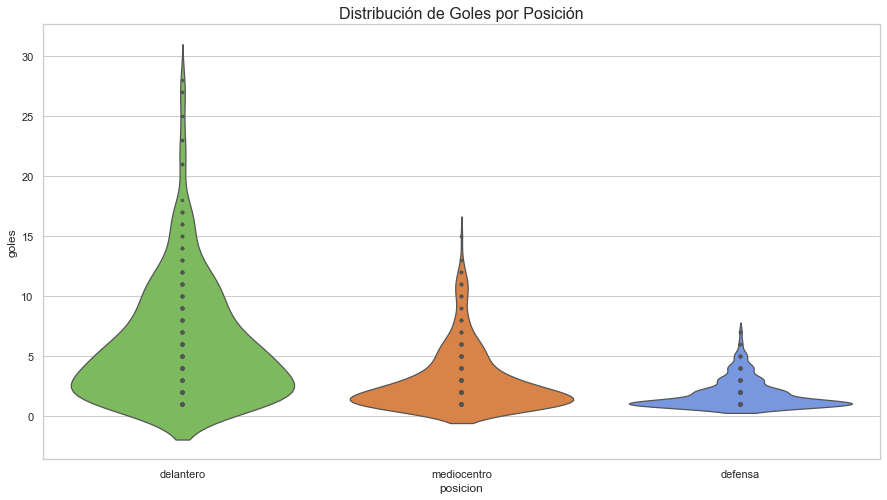

In [221]:
fig = plt.figure()
lista_colores = ['#78C850', '#F08030',  '#6890F0']
sns.violinplot(x="posicion", y="goles", data=h8, palette=lista_colores, inner="point")
plt.title("Distribución de Goles por Posición", fontsize=16)

## H9 Qué posisción ha dado más asistencias?

In [224]:
h9 = df_reales
h9.head()

,nombre,id_j,posicion,pj,pt,goles,asistencias,tarjetas,equipo,porteria
0,K. Mbappé,231747,delantero,35,34,28,17,10,psg,0
1,K. Benzema,165153,delantero,32,31,27,12,0,real_madrid,0
2,C. Immobile,192387,delantero,31,31,27,2,4,lazio,0
3,W. Ben Yedder,199451,delantero,37,29,25,5,3,monaco,0
4,M. Salah,209331,delantero,35,30,23,13,1,liverpool,0


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\788772257.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Distribución de Asistencias por Posición')

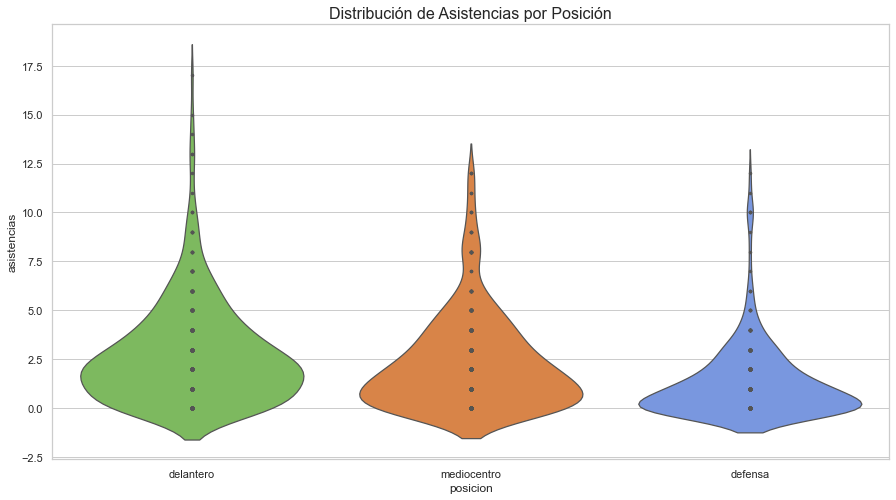

In [225]:
fig = plt.figure()
lista_colores = ['#78C850', '#F08030',  '#6890F0']
sns.violinplot(x="posicion", y="asistencias", data=h9, palette=lista_colores, inner="point")
plt.title("Distribución de Asistencias por Posición", fontsize=16)

## H10 Qué posisción ha dado más asistencias?

In [226]:
h10 = df_reales
h10.head()

,nombre,id_j,posicion,pj,pt,goles,asistencias,tarjetas,equipo,porteria
0,K. Mbappé,231747,delantero,35,34,28,17,10,psg,0
1,K. Benzema,165153,delantero,32,31,27,12,0,real_madrid,0
2,C. Immobile,192387,delantero,31,31,27,2,4,lazio,0
3,W. Ben Yedder,199451,delantero,37,29,25,5,3,monaco,0
4,M. Salah,209331,delantero,35,30,23,13,1,liverpool,0


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14852\2630491311.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Distribución de Tarjetas por Posición')

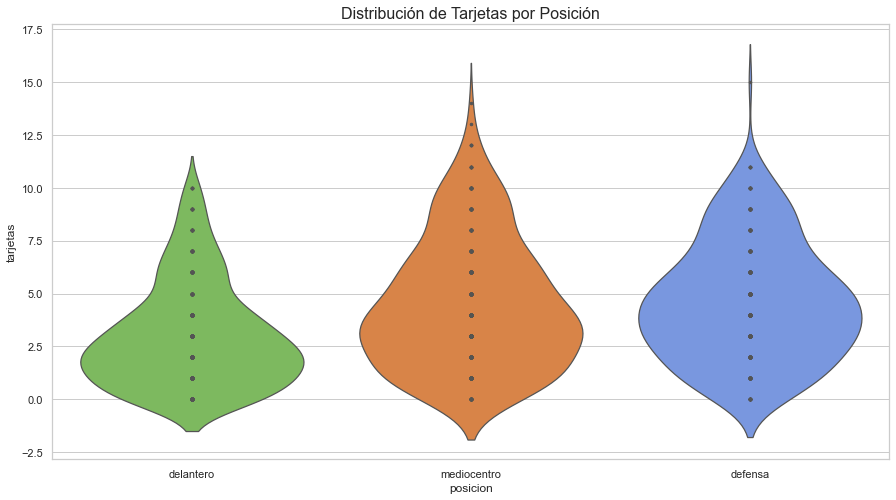

In [227]:
fig = plt.figure()
lista_colores = ['#78C850', '#F08030',  '#6890F0']
sns.violinplot(x="posicion", y="tarjetas", data=h10, palette=lista_colores, inner="point")
plt.title("Distribución de Tarjetas por Posición", fontsize=16)

# 3. CONCLUSIÓN
En este apartado queremos por último hacer un breve resumen de lo anteriormente expuesto dando unas pinceladas finales sobre las conclusiones inferidas. 

Como las conclusiones más interesantes son sobre todo esta última parte del trabajo, es decir la parte en la que se cruzan datos y estadistica reales con las del juego comenzaremos primero por estas.

Como se ha podido comprobar en los últimos gráficos de violin plot, están mucho más relacionados, como es natural, las posiciones de los delanteros con los goles realizados con respecto al resto de posiciones.

En cuanto a asistencias está mucho más repartido, aún siendo mucho más notable las asistencias de los delanteros he de decir que me ha llamado significativamente la atención ya que hay un número alto de asitencias tambien por parte de los defensas (imaginamos que serán los laterales).

Por útlimo, vemos que en cuanto a tarjetas por posición hay un gran equilibrio entre los mediocentros y los defensas. a pesar de que la lógica me indicaría que debería de haber muchas más para los defensas. Y de igual modo, hay un alto voluen de delanteros que han recibido tarjetas lo cual ha llamado también nuestra atención.

En cuanto a los análisis de la parte del Fifa, son análisis en gran medida superficiales que únicamente buscaban dar un poco de contexto en relación al año del dataset, no obstante quiero destacar las conclusiones obtenidas en la distribución tanto de la edad de los jugadores en los equipos top como de las medias en los mismos. 

Comenzamos por el primero, la "Distribución por Edad de Jugadores en Equipos Top", de un simple vistazo gracias al gráfico podemos obtener conclusiones como que las edades de los jugadores del liberpool estaban muy concentradas en entre los 25 y los 29 años. Que para el futbol no es un rango malo pero lo que indica es que no tiene un gran relevo generacional de la plantilla teniendo un grueso de jugadores bueno para competir pero sin ninguna visión de futuro. 

Por otro lado, podemos ver cómo equipos como el atleti, barsa, chelsea, manchester united y city tienen un bloque de jugadores balanceado contando con titulares experimentados y jovenes promesas que balanceen el proyecto a futuro del club.

Lo segundo que queríamos analizar de este bloque era la "Distribución de medias por jugador en equipos top". Como se puede apreciar, el napoli es con diferencia el club con las medias de jugadores más baja del top. También se puede destacar que los equipos como el atalanta, juve o inter el rango de medias en sus equipos es muy pequeños, y esto puede deberse a que las plantillas son mas cortas debido a que optan a competir por menos titulos y no necesitan hacer tantas rotaciones. Sin embargo, clubes con más recorrido en todas las competiciones como el Real Madrid, Paris st Germain o Bayern de munich cuentan con mas jugadores en sus plantillas que les permitan tener fondo de armario y de esta forma tener más canteranos y perfiles no tan experimentados.

He dejado para este análisis de conclusiones los dos bloques que más importancia tienen en el mismo, por un lado el análisis entre los cuatro jugadores elegidos (cristiano, messi, halland y mbappe) y por el otro la gran pregunta que daba sentido y nacimiento al presente trabajo: ¿hay alguna relación entre las estadisticas del fifa y las actuaciones reales de los jugadores?

Comenzando con el bloque de la comparación de jugadores, podemos destacar que los 4 jugadores tienen valores de tiro y de ritmo muy altos y similares entre sí. Mientras que en dribbling es Erling halland el que se queda más descolgado, no obstante en fisico los supera a los otros 3.

Y ya para clausurar este epigrafe dedicado a conclusiones, comentaremos que efectivamente gracias a los scatterplots planteados en el trabajo hemmos podido ver la correlación positva que tienen las estadisticas de tiro del Fifa con los goles realizados durante la temporada dando consistencia a la teoría de que cuando más habilidad de tiro tiene un jugador mayores numeros goleadores va a tener. Siendo de igual modo con las asistencias. Como última mención quiero destacar tambien el apartado en el que se analizan 3 variables a la vez, las de defensa, fisico y tarjetas recibidas en la temporada, tambien pudiendose obtener la conclusión de que cuanto más fisico tiene un jugador si tiene un nivel alto de defensa en el fifa la probabilida de obtener más tarjetas aumenta considerablemente.
